<a href="https://colab.research.google.com/github/vsa1920/REConnect_data/blob/main/Data_REConnect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from tensorflow import keras
import numpy as np
from google.colab import files

In [81]:
data = pd.read_csv("https://raw.githubusercontent.com/vsa1920/REConnect_data/main/Load_History.csv")
data.head()

,Date,Hour,Load
0,1/1/2008,1,151.1
1,1/1/2008,2,147.8
2,1/1/2008,3,145.3
3,1/1/2008,4,144.1
4,1/1/2008,5,146.5


In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
time_series = pd.DataFrame()

In [ ]:
time_series["ds"] = data["Date"] + pd.to_timedelta(data["Hour"], unit='h')
time_series["y"] = data["Load"]
time_series.head()

,ds,y
0,2008-01-01 01:00:00,151.1
1,2008-01-01 02:00:00,147.8
2,2008-01-01 03:00:00,145.3
3,2008-01-01 04:00:00,144.1
4,2008-01-01 05:00:00,146.5


In [ ]:
#!pip install fbprophet
import fbprophet

In [ ]:
model = fbprophet.Prophet()

In [ ]:
model.fit(time_series)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [48]:
future = model.make_future_dataframe(periods=24*31, freq='h')
future.tail()

,ds
35059,2011-12-31 20:00:00
35060,2011-12-31 21:00:00
35061,2011-12-31 22:00:00
35062,2011-12-31 23:00:00
35063,2012-01-01 00:00:00


In [49]:
forecast = model.predict(future)

In [50]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
35059,2011-12-31 20:00:00,147.906770,150.092558,242.701371,146.772391,148.771350,50.360527,50.360527,50.360527,28.562362,28.562362,28.562362,-0.357562,-0.357562,-0.357562,22.155727,22.155727,22.155727,0.0,0.0,0.0,198.267297
35060,2011-12-31 21:00:00,147.906478,152.051787,240.102776,146.768682,148.773040,46.547768,46.547768,46.547768,24.752074,24.752074,24.752074,-0.395575,-0.395575,-0.395575,22.191268,22.191268,22.191268,0.0,0.0,0.0,194.454246
35061,2011-12-31 22:00:00,147.906186,139.971887,230.359308,146.765065,148.774729,37.262011,37.262011,37.262011,15.475682,15.475682,15.475682,-0.440584,-0.440584,-0.440584,22.226913,22.226913,22.226913,0.0,0.0,0.0,185.168198
35062,2011-12-31 23:00:00,147.905894,127.312924,218.331498,146.761449,148.776419,24.606559,24.606559,24.606559,2.836324,2.836324,2.836324,-0.492425,-0.492425,-0.492425,22.262660,22.262660,22.262660,0.0,0.0,0.0,172.512454
35063,2012-01-01 00:00:00,147.905602,113.990764,201.996839,146.757832,148.777615,11.544831,11.544831,11.544831,-10.202853,-10.202853,-10.202853,-0.550825,-0.550825,-0.550825,22.298509,22.298509,22.298509,0.0,0.0,0.0,159.450433


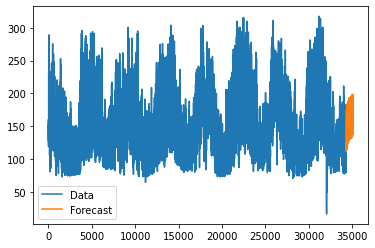

In [114]:
plt.plot(time_series["y"], label = "Data")
plt.plot(forecast["yhat"].iloc[len(time_series):], label = "Forecast")
plt.legend()
plt.savefig("Forecast.png")

In [116]:
files.download("Forecast.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
submission = pd.read_csv("https://raw.githubusercontent.com/vsa1920/REConnect_data/main/submission_template.csv", encoding = "utf-16")
submission.head()

,Date,Hour,Forecasted_Load
0,12/1/2011,1,NaN
1,12/1/2011,2,NaN
2,12/1/2011,3,NaN
3,12/1/2011,4,NaN
4,12/1/2011,5,NaN


In [73]:
submission["Forecasted_Load"] = list(forecast["yhat"].loc[len(time_series):])

In [76]:
submission.to_csv("Submission.csv")

In [108]:
files.download('Submission.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
## Part - 2
wtg_data = pd.read_csv("https://raw.githubusercontent.com/vsa1920/REConnect_data/main/WTG_AGGREGATION.csv")
wtg_data.head()
new_frame = pd.DataFrame(columns=["TIME_STAMP", "PLANT_ID", "TOTAL_POWER"])

In [90]:
plants = wtg_data["PLANT_ID"].unique()
data_20 = wtg_data.loc[wtg_data["PLANT_ID"] == 20]

array(['1982-10-15 00:00:00', '1982-10-15 00:15:00',
       '1982-10-15 00:30:00', '1982-10-15 00:45:00',
       '1982-10-15 01:00:00', '1982-10-15 01:15:00',
       '1982-10-15 01:30:00', '1982-10-15 01:45:00',
       '1982-10-15 02:00:00', '1982-10-15 02:15:00',
       '1982-10-15 02:30:00', '1982-10-15 02:45:00',
       '1982-10-15 03:00:00', '1982-10-15 03:15:00',
       '1982-10-15 03:30:00', '1982-10-15 03:45:00',
       '1982-10-15 04:00:00', '1982-10-15 04:15:00',
       '1982-10-15 04:30:00', '1982-10-15 04:45:00',
       '1982-10-15 05:00:00', '1982-10-15 05:15:00',
       '1982-10-15 05:30:00', '1982-10-15 05:45:00',
       '1982-10-15 06:00:00', '1982-10-15 06:15:00',
       '1982-10-15 06:30:00', '1982-10-15 06:45:00',
       '1982-10-15 07:00:00', '1982-10-15 07:15:00',
       '1982-10-15 07:30:00', '1982-10-15 07:45:00',
       '1982-10-15 08:00:00', '1982-10-15 08:15:00',
       '1982-10-15 08:30:00', '1982-10-15 08:45:00',
       '1982-10-15 09:00:00', '1982-10-15 09:1

In [100]:
for plant in plants:
  data_plant = wtg_data.loc[wtg_data["PLANT_ID"] == plant]
  time_stamps = data_plant["TIME_STAMP"].unique()
  for time_stamp in time_stamps:
    power_list = data_plant['POWER_GENERATED_KW'].loc[data_plant["TIME_STAMP"] == time_stamp]
    new_frame.loc[len(new_frame)] = [time_stamp, plant, sum(power_list)]

In [105]:
new_frame.iloc[90:120]

,TIME_STAMP,PLANT_ID,TOTAL_POWER
90,1982-10-15 22:30:00,20,519.87
91,1982-10-15 22:45:00,20,402.45
92,1982-10-15 23:00:00,20,600.39
93,1982-10-15 23:15:00,20,544.74
94,1982-10-15 23:30:00,20,374.08
95,1982-10-15 23:45:00,20,186.95
96,1982-10-16 00:00:00,20,173.14
97,1982-10-16 00:15:00,20,124.47
98,1982-10-15 00:00:00,21,55.26
99,1982-10-15 00:15:00,21,23.39


In [107]:
new_frame.to_csv("wtg_from_pandas.csv")

In [111]:
files.download("wtg_from_pandas.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>